# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#code provided by instructor
df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [56]:
# Checking the number of mice.
len(df["Mouse ID"].value_counts())


249

In [57]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate rows based on Mouse ID and Timepoint
duplicate_rows = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number
duplicate_mice = duplicate_rows['Mouse ID'].unique()

duplicate_mice
                    

array(['g989'], dtype=object)

In [58]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = df[df['Mouse ID'].isin(duplicate_mice)]

duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=['Mouse ID'])

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [60]:
micecount = len(clean_df['Mouse ID'].unique())

micecount

249

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by 'Drug Regimen'
grouped_df = df.groupby('Drug Regimen')

# Calculate mean of tumor volume for each regimen
mean_tumor_volume = grouped_df['Tumor Volume (mm3)'].mean()

# Calculate median of tumor volume for each regimen
median_tumor_volume = grouped_df['Tumor Volume (mm3)'].median()

# Calculate variance of tumor volume for each regimen
variance_tumor_volume = grouped_df['Tumor Volume (mm3)'].var()

# Calculate standard deviation of tumor volume for each regimen
std_dev_tumor_volume = grouped_df['Tumor Volume (mm3)'].std()

# Calculate standard error of the mean (SEM) of tumor volume for each regimen
sem_tumor_volume = grouped_df['Tumor Volume (mm3)'].sem()

# Create a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

# Print the summary statistics table
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

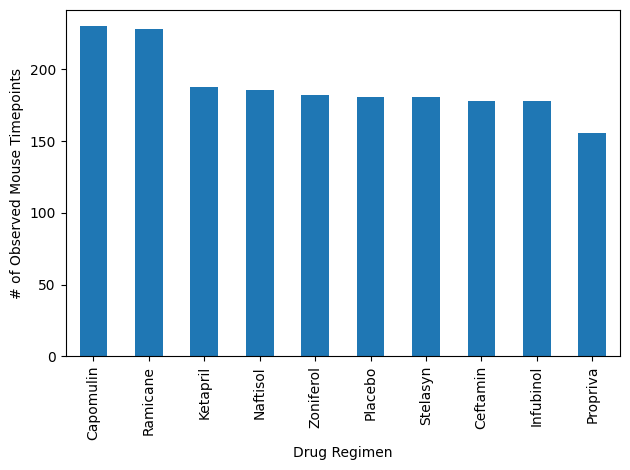

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by 'Drug Regimen' and 'Mouse ID' and count the number of unique Timepoints
drug_timepoint_counts = df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].nunique()

# Sum the counts for each drug regimen
drug_counts = drug_timepoint_counts.groupby('Drug Regimen').sum()

# Sort the counts by ascending value
drug_counts_sorted = drug_counts.sort_values(ascending=False)

# Generate a bar plot using Pandas
drug_counts_sorted.plot(kind='bar',)

# Add title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.tight_layout()
plt.show()


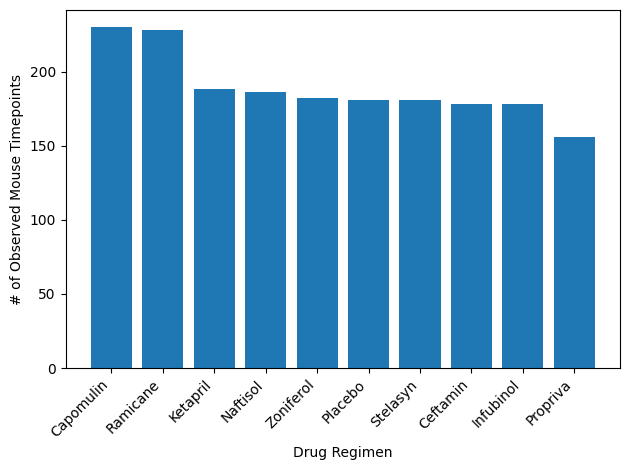

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group by 'Drug Regimen' and 'Mouse ID' and count the number of unique Timepoints
drug_counts = df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].nunique().groupby('Drug Regimen').sum()

# Sort drug counts in descending order
drug_counts = drug_counts.sort_values(ascending=False)

# Generate a bar plot
plt.figure
plt.bar(drug_counts.index, drug_counts.values)

# Add title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



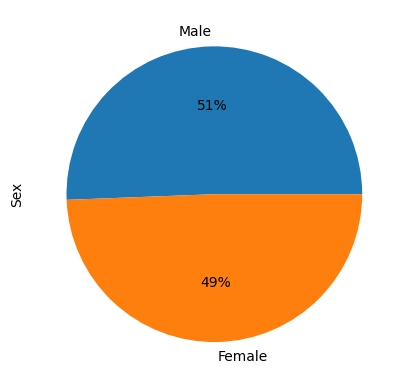

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group by 'Sex' and count the number of mice
gender_distribution = df['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.0f%%')

# Display the plot
plt.ylabel('Sex')  
plt.show()


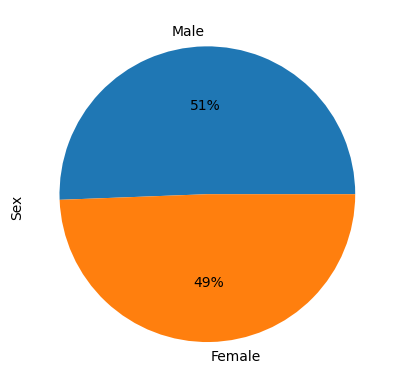

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Count the number of female and male mice
gender_distribution = df['Sex'].value_counts()

# Create a list of labels for the pie chart
labels = gender_distribution.index

# Create a list of corresponding values
sizes = gender_distribution.values

# Generate a pie plot
plt.pie(sizes, labels=labels, autopct='%1.0f%%')

# Add custom ylabel
plt.ylabel('Sex', rotation=90, ha='right', va='center')


# Display the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = df[df['Drug Regimen'].isin(selected_regimens)]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, df, on=['Mouse ID', 'Timepoint'], how='inner')

final_tumor_volume_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [68]:
#Utilized chat GPT here to figure out how to calculate quartiles, bounds, and iqr within the loop
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each treatment group
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Store tumor volume data for this treatment group
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    # Print summary statistics
    if outliers.empty:
        print(f"{treatment}'s potential outliers: {outliers}")
    else:
        print(f"{treatment}'s potential outliers: {outliers.values.tolist()}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


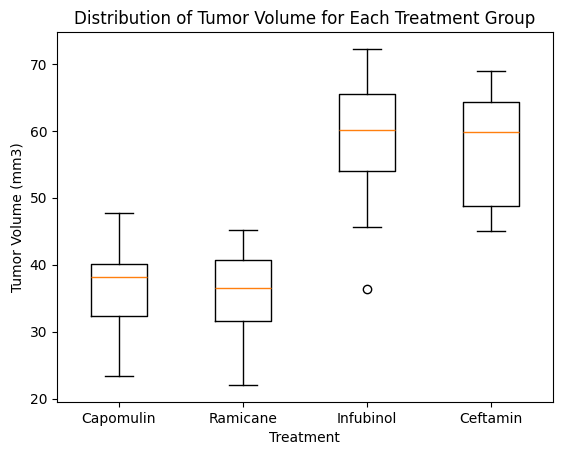

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments)

# Add labels and title
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()


## Line and Scatter Plots

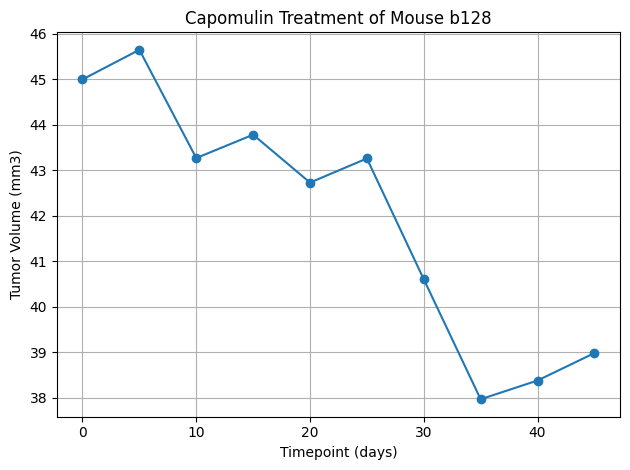

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Filter the DataFrame to get data for mice treated with Capomulin
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Choose a single mouse from the filtered data 
mouse_id = capomulin_data['Mouse ID'].iloc[0]

# Filter the DataFrame to get data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')

# Add labels and title
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



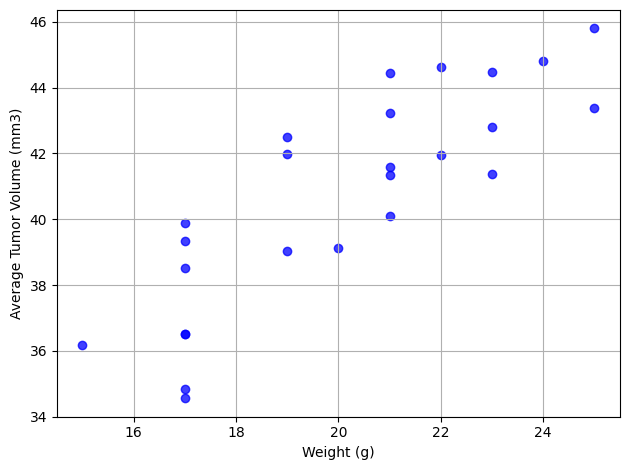

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter the DataFrame to get data for mice treated with Capomulin
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue', alpha=0.75)

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


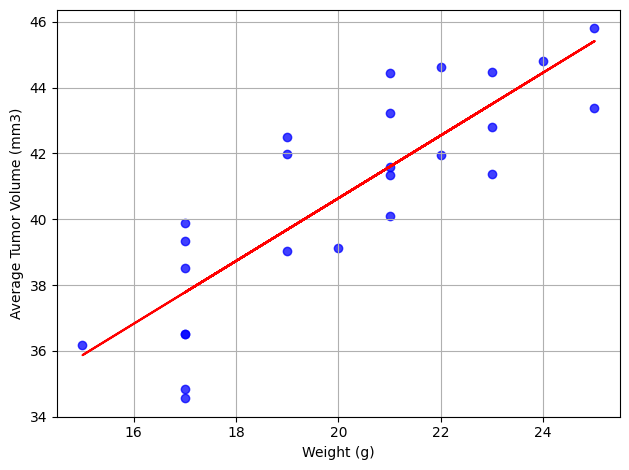

In [72]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Filter the DataFrame to get data for mice treated with Capomulin
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue', alpha=0.75)

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show grid
plt.grid(True)

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(mouse_weight, average_tumor_volume)
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

# Plot the linear regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')

# Show the plot
plt.tight_layout()
plt.show()

